In [1]:
import argparse
import torch

import matplotlib.pyplot as plt
import torch.multiprocessing as mp

from ga_t3.ga_model_runner import GAModelRunner
from ga_t3.base_model_runner import GpuRunnner

parser = argparse.ArgumentParser(description="Language transfer")

# main parameters
parser.add_argument("--number_of_gpus", type=int, default=1)
parser.add_argument("--models_per_gpu", type=int, default=1)

parser.add_argument("--ga_population_size", type=int, default=20)
parser.add_argument("--number_of_iterations", type=int, default=500)
parser.add_argument("--neural_estimator_iteration_start", type=int, default=50)
parser.add_argument("--ga_neural_estimator_iterations_per_ga_iteration", type=int, default=1)
parser.add_argument("--neural_crossover_iteration_threshold", type=int, default=200)
parser.add_argument("--ga_generate_only_unique_xy", type=bool, default=True)
parser.add_argument("--log_ga_into_file", type=bool, default=True)
parser.add_argument("--verbose", type=bool, default=True)
parser.add_argument("--ga_use_random_exchange", type=bool, default=False)
parser.add_argument("--use_neural_crossover", type=bool, default=False)
parser.add_argument("--use_neural_estimator", type=bool, default=True)
parser.add_argument("--exchange_best_every_n_iterations", type=int, default=10)
parser.add_argument("--select_best_of_group", type=int, default=5)
parser.add_argument("--distribute_best", type=int, default=10)


params = parser.parse_args([])
print(params)

processes = []

params.number_of_gpus = 1
params.models_per_gpu = 1
params.log_ga_into_file = False
params.verbose = True

params.ga_use_random_exchange = False
params.ga_population_size = 20

params.exchange_best_every_n_iterations = 1
params.select_best_of_group = 5
params.distribute_best = 5
params.my_device = 'cuda'

gpu_num = params.number_of_gpus
model_num = params.models_per_gpu

ga_model_runner = GAModelRunner(gpu_num, model_num, params)
accumulatove_runner = ga_model_runner.accumulative_runner

def model_runner_factory(gpu_num, model_num, params):
    return ga_model_runner

gpu_runner = GpuRunnner(gpu_num, params, model_runner_factory)

gpu_runner.iterate(params.number_of_iterations)



Namespace(number_of_gpus=1, models_per_gpu=1, ga_population_size=20, number_of_iterations=500, neural_estimator_iteration_start=50, ga_neural_estimator_iterations_per_ga_iteration=1, neural_crossover_iteration_threshold=200, ga_generate_only_unique_xy=True, log_ga_into_file=True, verbose=True, ga_use_random_exchange=False, use_neural_crossover=False, use_neural_estimator=True, exchange_best_every_n_iterations=10, select_best_of_group=5, distribute_best=10)
Creating transformers
0.210561 M parameters
Transformer created 0
0.210561 M parameters
Transformer created 1
0.210561 M parameters
Transformer created 2
0.210561 M parameters
Transformer created 3
0.210561 M parameters
Transformer created 4
0.210561 M parameters
Transformer created 5
0.210561 M parameters
Transformer created 6
0.210561 M parameters
Transformer created 7
0.210561 M parameters
Transformer created 8
0.210561 M parameters
Transformer created 9
0.210561 M parameters
Transformer created 10
0.210561 M parameters
Transforme

Exchanged best models on gpu 1
Starting iteration 4 on gpu 1
iteration=4
xy: f=7.000804279948335, d=AUABQQYEQHX54GAOTPGMW9KZFKEMDPSERNT7AGRZAAKMD
xy: f=7.000761484621417, d=3UABQQ2EQHI54GB9TPGMW9KZNKEMDPSERNT7AGRZAAOJD
xy: f=7.000288702203544, d=IUABQQ2EQHI54GB9NPG0W9KZNKEMDPSERNT7AGRZAAKLD
xy: f=6.000895750137726, d=3UABQQ2EQKX54GAOTPGMW9KZFKEMDPSERNT7AGHZAAKJD
xy: f=6.0008080608749035, d=2S6LZNQ9AE5AANFOTPGMW9KZFKEMDPSERNT7AGRZAAKLD
xy: f=6.0007563292590795, d=3UABQQ2EQHX54G6OTPGMW9KZFKEMDPSERNT7AGRZAAKJD
xy: f=6.000749568520289, d=3UABQQ2EQHI54GB4TPGMW9KZFKEMDPSERNT7AGR4YP3GZ
xy: f=6.000642579744959, d=3MABQN2EQHX64GAOTPGMW9KZFKEMDPSERNT7AGRZAAKJZ
xy: f=6.000551703371915, d=3UABQQ2EEHI54GAOTPGMW9KZFKEMDQSQRNT7AGRZAAKJD
xy: f=6.000177691780628, d=3UABQQ2EQHX54G6OTPGMW9KZFKEMDPSERNTFAGRZAAKHD
xy: f=6.000055899756649, d=3UABQQYEQHX54GAOTPGMW9KZFKEMDPSERNT7AGRZAAKJD
xy: f=6.000046941938233, d=3QABQQDEQHX54G6OTPGMK9KZFKEMDPSERNT7AGRZAAKJD
xy: f=5.000856366413015, d=2S6LZNQ9AE59ANFOTPGOW9

Average loss=4.516302108764648, total_samples=170
Time of iteration is 0.06280970573425293, it=12, gpu=1
GAModelRunnner step : 0.062810 s
Ended iteration 11 on gpu 1, taken = 0.06280970573425293, time/iteration = 0.06280970573425293, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 12 on gpu 1
iteration=12
xy: f=11.000083463337344, d=AFABQQYXAE5AAGB9NPG7W0KSPKEMDPSERNXBAGKZAAOJG
xy: f=10.000983604105409, d=AOABR5SE3HX5KGB9NEGJL9KZ2KEMDE2ERNT7AGRZAAOJG
xy: f=10.000811199752231, d=AFABQQYXAE5AANFOTPGMW957PJEMDPSEBZT7AGRZAAOJG
xy: f=10.00079939764138, d=AFABQQYXAE5AANFOTPGMW9KSPKEMDPSERNT7AGRZAAOJG
xy: f=10.000120002241303, d=AOABQQRXAE5AANFOTPGMW957PJEMDPSERZT7AGRZAAOJG
xy: f=10.00007185313593, d=AFABQQYXAE5AANFOTPGMW9KSPKEMDPEERNT7AGRZAA1JG
xy: f=9.000918607934043, d=AU0BSQYXAE5KANFOTPGYW957PJEMLPSERZT7AGRZAAOJG
xy: f=9.000834054615625, d=AUABQQYEMH44KGB9NPG7W0KSPKEMDPSERNXBAGKZAAOJG
xy: f=9.000735843486119, d=AU0BQQYXAE5AANFOTPGMW957PJEMDPSERZT7AGRZAAOJG
xy: f=9.00054

Average loss=6.770300388336182, total_samples=263
Time of iteration is 0.07174110412597656, it=19, gpu=1
GAModelRunnner step : 0.071741 s
Ended iteration 18 on gpu 1, taken = 0.07174110412597656, time/iteration = 0.07174110412597656, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 19 on gpu 1
iteration=19
xy: f=14.00081209407999, d=AFABQGYVAE5AALB93WGJL9KZGKEMFF2ERNT7AGRZAAOJG
xy: f=13.000784706051219, d=AFABQGYXAE5AANB9NEGJL9KZ2KEMFF2ERNT7AGRZAAKLG
xy: f=13.000746914888634, d=AFABQGYVAE5AANB9NEGJL9KZ2KEEFFREQNT7AGRZAAOJG
xy: f=13.000616831102697, d=AFABQGYVAE5AANB9NEGJL92Z2KEMFF2E5NT7AGRZAAOJG
xy: f=13.000459381104195, d=AFABQGYXAE5AANB9N7GJL9KZ2VEMFF2EFNT7AGRYAADLG
xy: f=13.000452838929759, d=AFABYG7VAE5AA6B9NEGJLPCZ2KEMFF2E7NT7AGRZAAOJG
xy: f=13.00040851319257, d=AFABQGYXAE5AANB9N7GJL9KZ2VEMFF2EFNT7AGRYAADLG
xy: f=13.000132086470517, d=AFABQGYXAE5AANB9NEGJL9KZ2KEMFF2ERNT7AGRZAAOJG
xy: f=13.000069987815388, d=AFABQGYVAE5AANB9NEGJL9KZ2KEMFF2ERNT7AGRZAAOJG
xy: f=13.0

Ended iteration 25 on gpu 1, taken = 0.0625298023223877, time/iteration = 0.0625298023223877, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 26 on gpu 1
iteration=26
xy: f=15.000986416245244, d=AKABQGYVAENAALB93WGJL9KZGKEMFF2ERNT7AGAYAADLG
xy: f=15.000883154759475, d=AFABYG7VAE5AALB92WGJL9KZGKEMFF27FNT7AGRMAABLG
xy: f=15.000847403510939, d=AFABYG7VAE5AALB93WGJL9KZGKEMFF27FNT7AGRMAABLG
xy: f=15.000624098349917, d=AFABYG7VAH5AALB93WGJL9KZGKEMFF2ERNT7AGAYAADXG
xy: f=15.00050578260702, d=AKABQGYVAENAALB9BWGJL9KZGKEMFF2ERNT7AGRYAADXG
xy: f=15.00048942753477, d=AKABQGYVAENAALB93WGJL9KZGKEMFF2ERNT7AGAYAADXG
xy: f=15.000460259611419, d=AKABQGYVA1NAALB93WGJL9K2GKEMFF2ERNT7AGRMAABLG
xy: f=15.000177885940543, d=AFABYG7VAH5AALB94WGJL9KZGKEEFF2EFNT7AGRMAABLG
xy: f=14.000800984918186, d=AKABQGYVI1NAALB93WGJL9KZGKEEFF2EFNT7AGRMAABLG
xy: f=14.00058767211505, d=AKABQGYVAENAALB93WGJL9KZ2KEMFF2ERNT7AGRMAABLG
xy: f=14.000577973868996, d=AFABYG7VAE2AALB9PWGHL9KZGKEMF2270N9DIGRMAABLG
xy:

Average loss=2.1618173122406006, total_samples=471
Time of iteration is 0.06263971328735352, it=34, gpu=1
GAModelRunnner step : 0.062640 s
Ended iteration 33 on gpu 1, taken = 0.06263971328735352, time/iteration = 0.06263971328735352, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 34 on gpu 1
iteration=34
xy: f=17.000350355182356, d=AFABYG7VAE5LAAB93CGTL9RZGKEMFF2ERNT7AGAMAABLG
xy: f=17.00021862909422, d=AKABQG7VAE5AAAB93WGJL9KZGKEMF1PERNT7AGAMAABLG
xy: f=17.000181265149543, d=AFABYG7VAENAALBA3WGJL9KZGKEMF12ERNT7AGAMAABLG
xy: f=17.00002405219265, d=AKABQG7AAE5AAAB98WGJL9KZGKEMF22R0K97AGAMAABLG
xy: f=16.000995923446766, d=AKABQG7AAE5AAAB98WGJL9KZGKEMF22RXP97AGAMA1BLG
xy: f=16.000684654156366, d=AFABYG7VAH5AALB93WGJL9K4GKAMF12ERNTY8GAMAABGG
xy: f=16.000263310725018, d=AFABYG7VAENAA4B93WGJL9KZGKEMF1PERNT7AGALAABLG
xy: f=16.000230355409595, d=AKABQGYVAENAALB93WGJL9KZGKEMF12ERNT7AGAMAABGG
xy: f=16.00013429068423, d=AEABQGYVAENAALB93WGJL9YZGKEMF22R0K97AGAMAABLG
xy: f=16.0

Average loss=1.747532606124878, total_samples=565
Time of iteration is 0.0582888126373291, it=41, gpu=1
GAModelRunnner step : 0.058289 s
Ended iteration 40 on gpu 1, taken = 0.0582888126373291, time/iteration = 0.0582888126373291, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 41 on gpu 1
iteration=41
xy: f=19.000682826396243, d=AKABQG7AAE5AAAB99LGJL9KAGKEMF1AERNT7AGAMAABTG
xy: f=18.000841002218483, d=AKABQG7AAE5NAAB99LG3L9KAGKEMF22RGK97AGAMSABLG
xy: f=18.000817164054947, d=AKABLG7AAH5QAAB99LGJL9KAGKEMF22R9QT7AGAJAABTG
xy: f=18.000745786834333, d=A1ABLG7AAH5AAAB99LGJL9KAGKEMF22P0K97AGAMAABLG
xy: f=18.000720611786022, d=AKABQG7AAE5AAABT9LGJL9KAGKEMF22RGKT7AGAJAABTG
xy: f=18.000703602666526, d=AKABQG72AE5AAAB99LGJL9KAGKEMF22RGK97AGAMAABLG
xy: f=18.00069105861744, d=AKABQG7AAE5AAAB99LGJL9KAGKEMF22RGK97AGAMAABLG
xy: f=18.000630688096837, d=AKABLG7AAH5AAAB99LGJL9KAGKEMF22RGQT7AGAJAABTG
xy: f=18.000179553753096, d=AKABQG7AAE5AAAB99LGJL9KAGKEMT1LERNT7AGAMAABLG
xy: f=18.000

xy: f=19.00096449739837, d=AFABYG7VAHNAAAB99LGJL9KAGKEMFDAERNT7AGAMAABTG
xy: f=19.00055108309944, d=AKABQG77AE5GAALJ9LGJL9KAGKEMF1AERNT7AGAMAABTG
xy: f=19.00053736659748, d=AFABYG7VAHNAAAB99LGJL9KAGKEMF1AERNT7AGAMAABTG
xy: f=19.00047184114644, d=AFABYG7VAHNAAAB99LGJL9KAGKEMF1ARRNT7AGAMAABTG
xy: f=19.000394944763357, d=AKABQG7AAE5GAA6P9LGJL9KAGKEMV1AERBT7AGAMAABTG
xy: f=19.0002925456206, d=AKABYG7VA45AAAB99LGJL9KAGJERF1ABKNT7AGAMAABTG
xy: f=19.000164836661792, d=AFABYG7VAHNAAAB99LGJL9KAGKEMV1AERNT7AGAMAABTG
xy: f=19.000061156238097, d=AFABYG7VAHNAAAB99LGJL9KAGKEMF1AERNT7AGAMAABTG
xy: f=19.000017165515708, d=AKABYG7VA45AAAB99LGJL9KAGJERF1ABKNT7AGAMAABTG
xy: f=18.000870956549623, d=AFABYG7VAHNIAAB99LGJL6KAGKEZF1AZRNT7AGAMRAQTG
xy: f=18.00074673619494, d=AKABQG7AAT5GHABJ9LGJL9KRGKEXF1AERNT7AGAMAABTG
xy: f=18.000469178267824, d=AFABYG7VAHNAAABQ9LGJL9KAGKEMF1NERNT7AGAMAABTG
xy: f=18.000456917729064, d=AFABYG7VAHNAAAB99LGJLDKAGKEMF1ARRNT7AG0MAABTG
xy: f=19.00053736659748, d=AFABYG7VAHNAAAB99L

Average loss=2.6450297832489014, total_samples=748
Time of iteration is 0.10217452049255371, it=55, gpu=1
GAModelRunnner step : 0.102175 s
Ended iteration 54 on gpu 1, taken = 0.10217452049255371, time/iteration = 0.10217452049255371, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 55 on gpu 1
iteration=55
xy: f=19.000960115203085, d=AFABYG7VA4RFAAB99LGJL9KAGKEMEDAERNT7AGAMAABTG
xy: f=19.000947098967107, d=AKABYG7VAZNAAAB99LGJL9FAGKEMV1AERNF7AGAMAABTG
xy: f=19.000843365419005, d=A9ABYG7VA45AAAB99LGJL9KAGKEMEDFZRLT7AGAMAABTG
xy: f=19.000842799195283, d=AFABYG74AH5AAAB99LGJL9KAGKEMV1AERZTRAGAMAABTG
xy: f=19.0007261631316, d=AFAB0G7VA4RAAAB99LGJL9KAGKEMEDAERNT7AGAMAABTG
xy: f=19.000692648769597, d=AKABYG7VAZNAAAB99LGJL9FAGKEMV1AERNT7AGAM7ABTG
xy: f=19.00061297690311, d=AFABYG7VA6NAAAB99XGJL93AGKEMF1AERNTRAGAM7ABTG
xy: f=19.000609387086055, d=AFABYG7VA4FAAAB9HLGJL9KAGKEM5DAERNT7AGAMAABTG
xy: f=19.000457836657624, d=AFABYG7VA4RAAAB99LGJL9KAGKEMEDAERNT7AGAMAABTG
xy: f=19.0

Average loss=0.5346720218658447, total_samples=815
Time of iteration is 0.07376980781555176, it=61, gpu=1
GAModelRunnner step : 0.073770 s
Ended iteration 60 on gpu 1, taken = 0.07376980781555176, time/iteration = 0.07376980781555176, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 61 on gpu 1
iteration=61
xy: f=20.000749349318777, d=AKABYG7VA45AAAB99LGJL9MAGKEM01AERNT7AGAMAABTG
xy: f=20.000565306253236, d=AKABYG7VA45AAAB99LGJL9MAGKEM01AERST7AGAMAABTG
xy: f=20.000499827244006, d=AKABYG7VA45AAAB99LGJL9MAGKEM01AERST7AGAMAABTG
xy: f=20.000313205850752, d=AKABYG7VA45AAAB99LGJL9MAGKEM01ATRNT7AGAMAABTG
xy: f=20.000205396868534, d=AKABYG7VA45AAAB99LGJL9MAGKEM01AERNTWAGAMPABTG
xy: f=20.00019873514001, d=AKABYG7VA45AAAB99LGJL9MAGKEG01AERNT7AGAMAABTG
xy: f=19.000922392295106, d=AKABYG7VA45AAAB99LGJL9KAGKVMF1AERNTFAGAMAABIG
xy: f=19.000570856318525, d=AKABYG7VA4DAAAB99LGJL9KAGKEV01AER1T7AGAMAABTG
xy: f=19.00043162387172, d=AKABYG7VA45AAAB99LGJLEKAGKEMF1AETNT7AGAMAABQG
xy: f=19.

Average loss=1.4828096628189087, total_samples=861
Time of iteration is 0.09998536109924316, it=67, gpu=1
GAModelRunnner step : 0.099985 s
Ended iteration 66 on gpu 1, taken = 0.09998536109924316, time/iteration = 0.09998536109924316, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 67 on gpu 1
iteration=67
xy: f=20.0008383533799, d=AKABYG7VA45AAABW9LGJL9MAGKEMF1AETNT7AGAMAABKG
xy: f=20.00079721362704, d=AKABYG7VA45AAAB99LGJL9MAGKEM01AERST7AGAMAABTG
xy: f=20.000735768825876, d=AKABYG7VA45AAAB99LGJL9MAGKEM01ATR3T7AGAMAABTG
xy: f=20.00072844803621, d=AKABYG7VA45AAAB99LGJL9MAGKEMF1AETNT7AGAMAABTG
xy: f=20.000670987182914, d=AKABYG7VA45AAAB99LGJL9MAGKEMF1AORST7AGAMAABKG
xy: f=20.000662382172898, d=AKABYG7VA45AAAB99LGJL9MAGKEMF1AETNT7AGAMAABTG
xy: f=20.000597517317033, d=AKABYG7VA45AAAB99LGJL9MAGKEM01ATRNT7AGAMAABTG
xy: f=20.000514741696843, d=AKABYG7VA45AAAB99LGJL9MAGKEM01AERNT7AGAMAABTG
xy: f=20.00039757202016, d=AKABYG7VA45AAAB99LGJL9MAGKEMF1AETNT7AGAMAABQG
xy: f=20.000

Average loss=0.7493077516555786, total_samples=908
Time of iteration is 0.09257102012634277, it=73, gpu=1
GAModelRunnner step : 0.092571 s
Ended iteration 72 on gpu 1, taken = 0.09257102012634277, time/iteration = 0.09257102012634277, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 73 on gpu 1
iteration=73
xy: f=20.000993481001277, d=AKABYG7VA45AAAB99LGJL9MAGKEM01AERST7AGAMAABTG
xy: f=20.000864787582472, d=AKABYG7VA45AAAB99LGJL9MAGKIM01AERST7AGAMAABTG
xy: f=20.000740796547756, d=AKABYG7VA15AAAB99LGJL9MAGKEM01AERST7AGAMAABTG
xy: f=20.000737079410012, d=AKABYG7VA45AAAB99LGJL9MAGKEMF1AORHT7AGAMAABTG
xy: f=20.000642311106258, d=AKABYG7VA45AAAB99LGJL9MAGKEM01AERST8AGAMAABTG
xy: f=20.000614694356113, d=AKABYG7VA45AAAB99LGJL9MAGKEM01AERST7AGAMAABTG
xy: f=20.000610991665358, d=AKABYG7VA45AAAB99LGJL9MAGDEMB1AERST7AGAMAABTG
xy: f=20.000576070922335, d=AKABYG7VA45AAAB99LGJL9MAGKEM01A6RST7AGAMAABTG
xy: f=20.00055699324366, d=AKABYG7VA4PAAAB99LGJL9MAGKEM01AERST7AGAMAABTG
xy: f=20

Average loss=1.0883431434631348, total_samples=961
Time of iteration is 0.09674191474914551, it=79, gpu=1
GAModelRunnner step : 0.096742 s
Ended iteration 78 on gpu 1, taken = 0.09674191474914551, time/iteration = 0.09674191474914551, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 79 on gpu 1
iteration=79
xy: f=22.000205077648086, d=AKABYG7LA45AAAB99LGAL9MAGKEM01AERST7AGAMAABTG
xy: f=21.000613257246844, d=AKABYG7LAG5AAAB99LGJL9MAGBEMF1A6RST7AGAMAABTG
xy: f=21.000225054666263, d=AKABYG7LA45AAAB99LGAL9FAGBEMF1A6RST7AGAMAABTG
xy: f=21.000100706519987, d=AKABYG7VA45AAAB99LGJL9MAGKEM01AERSDMAGAMAABTG
xy: f=20.00097541504557, d=AKABYG7VA45AAAB99LGJL9MAGKEM01AYRST7AGAMAABTG
xy: f=20.000969502069175, d=AKABYG7VA45AAAB99LGJL9MAGKEM01AEYHT7AGAMAABTG
xy: f=20.000946431659106, d=AKABYG7VA45AAAB99LGJL9MAGKEM01AERST7AGAMAABTG
xy: f=20.000934922697834, d=AKABYG7VA45AAAB99LGJL9MAGKEMF1AERHT7AGAMAABTG
xy: f=20.0008190794468, d=AKABYG7VA45AAAB99LGJL9MAGKEM61AERHT7AGAMAABTG
xy: f=20.0

Average loss=0.8428605794906616, total_samples=1004
Time of iteration is 0.0904998779296875, it=84, gpu=1
GAModelRunnner step : 0.090500 s
Ended iteration 83 on gpu 1, taken = 0.0904998779296875, time/iteration = 0.0904998779296875, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 84 on gpu 1
iteration=84
xy: f=22.000291305583367, d=AKABYG7LA45AAAB99LGAL9MAGKEM01AERST7AGAMAABTG
xy: f=22.000280140307893, d=AKABYG7VA45AAAB99LGJL9MAGKEM01AEASDMAGAMAABTG
xy: f=22.00025367987545, d=AKABYG7LA45AAAB99LGAL9MAGKEM01AERST7AGAMAABTG
xy: f=22.000149708493723, d=AKABYG7LA45AAAB99LGAL9MAGKEM01AERST7AGAMAABTG
xy: f=22.000131221013426, d=AKABYG7LA45AAAB99LGAL9MAGKEM01AERST7AGAMAABTG
xy: f=21.000834512224106, d=AKABYG7VA45AAAB99LGJL9MAGKEM01AERLT7AGAMAABTG
xy: f=21.00058037279085, d=AKABYG7LAGWAAAB99LGJL9MAGKLMF1AORHT7AGAMAABTG
xy: f=21.000568097749824, d=AKABYG7VA45AAAB99LGAL9MAGKEM01AERST7AGAMAABTG
xy: f=21.000370953126733, d=AKABYG7VA45AAAB99LGAL9MAGKEM01AERST7AGAMAABTG
xy: f=21.00

Average loss=0.5698498487472534, total_samples=1046
Time of iteration is 0.09094047546386719, it=90, gpu=1
GAModelRunnner step : 0.090940 s
Ended iteration 89 on gpu 1, taken = 0.09094047546386719, time/iteration = 0.09094047546386719, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 90 on gpu 1
iteration=90
xy: f=24.000934829896295, d=AKABYG7LA45AAAB99LGAL9MAGKEM01AEASDMAGAMAABTG
xy: f=24.00049125309098, d=AKABYG7LA45AAAB99LGAL9MAGKEM01AEASDMAGAMAABTG
xy: f=24.000484140807245, d=AKABYG7LA45AAAB99LGAL9MAGKEM01AEASDMAGAMAABTG
xy: f=23.000598286157125, d=AKABYG7LA45AAAB99LGJL9MAGKEM01AEASDMAGAMAABTG
xy: f=23.000467059527086, d=AKABYG7LA45AAAB99LGJL9MAGKEM01AEASDMAGAMAABTG
xy: f=23.00038075742613, d=AKABYG7LA45AAAB99LGJL9MAGKEM01AEASDMAGAMAAB1G
xy: f=23.000354225248437, d=AKABYG7LA45AAAB99LGJL9MAGKEM01AEASDMAGAMAABTG
xy: f=23.000138682646604, d=AKABYG7LA45AAAB99LGAL9MAGKEM01AERLT7AGAMAABTG
xy: f=23.000050779534998, d=AKABYG7LA45AAAB99LGAL9MAGKEM01AERLT7AGAMAABTG
xy: f=23

Average loss=1.5846039056777954, total_samples=1082
Time of iteration is 0.09530925750732422, it=95, gpu=1
GAModelRunnner step : 0.096321 s
Ended iteration 94 on gpu 1, taken = 0.09632086753845215, time/iteration = 0.09632086753845215, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 95 on gpu 1
iteration=95
xy: f=24.00096724289402, d=AKABYG7LA45AAAB99LGAL9MAGKEM01AEASDMAGAMAABTG
xy: f=24.000590468382747, d=AKABYG7LA45AAAB99LGAL9MAGKEM01AEASDMAGAMAABTG
xy: f=24.000474253849763, d=AKABYG7LA45AAAB99LGAL9MAGKEM01AEASDMAGAMAABTG
xy: f=24.0004352409463, d=AKABYG7LA45AAAB99LGAL9MAGKEM01AEAIDMAGAMAABTG
xy: f=24.000389846397653, d=AKABYG7LA45AAAB99LGAL9MAGKEM01AEASDMAGAMAABTG
xy: f=24.000160301647444, d=AKABYG7LA45AAAB99LGAL9MAGKEM01AEASDMAGAMAABTG
xy: f=24.000121223226436, d=AKABYG7LA45AAAB99LGAL9MAGKEM01AEASDMAGAMAABTG
xy: f=24.000105608925523, d=AKABYG7LA45AAAB99LGAL9MAGKEM01AEASDMAGAMAABTG
xy: f=24.000105179337318, d=AKABYG7LA45AAAB99LGAL9MAGKEM01AEASDMAGAMAABTG
xy: f=24.

Average loss=1.912109136581421, total_samples=1115
Time of iteration is 0.10511946678161621, it=100, gpu=1
GAModelRunnner step : 0.105119 s
Ended iteration 99 on gpu 1, taken = 0.10614204406738281, time/iteration = 0.10614204406738281, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 100 on gpu 1
iteration=100
xy: f=24.000892732705662, d=AKABYG7LA45AAAB99LGAL9MAGKEM01AEASDMAGAMAABTG
xy: f=24.000888155713, d=AKABYG7LA45AAAB99LGAL9MAGKEM01AEASDMAGAMAABTG
xy: f=24.000842214799555, d=AKABYG7LA45AAAB99LGAL9MAGKEM01AEASDMAGAMAABTG
xy: f=24.000841390299712, d=AKABYG7LA45AAAB99LGAL9MAGKEM01AEASDMAGAMAABTG
xy: f=24.000830465306734, d=AKABYG7LA45AAAB99LGAL9MAGKEM01AEASDMAGAMAABTG
xy: f=24.000786356025845, d=AKABYG7LA45AAAB99LGAL9MAGKEM01AEASDMAGAMAABTG
xy: f=24.000663885260114, d=AKABYG7LAR5AAAB99LGAL9MAGKEM01AEASDMAGAMAABTG
xy: f=24.000655889302557, d=AKABYG7LA4EAAAB99LGAL9MAGKEM01AEASDMAGAMAAB0G
xy: f=24.000557487028644, d=AKABYG7LA45AAAB99LGAL9MAGKEM01AEAS1MAGAMAABTG
xy: f=2

Average loss=0.9582054615020752, total_samples=1154
Time of iteration is 0.09534382820129395, it=107, gpu=1
GAModelRunnner step : 0.096357 s
Ended iteration 106 on gpu 1, taken = 0.09635734558105469, time/iteration = 0.09635734558105469, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 107 on gpu 1
iteration=107
xy: f=24.0009712813492, d=AKABYG7LA45AAAB99LGAL9MAGKEM01AEASDMAGAMAABTG
xy: f=24.00091060215095, d=AKABYG7LA45AAAB99LGALGMAGYEM01A2ASDMAGAMAABTG
xy: f=24.000881125346382, d=AKABYG7LA45AAAB99LGAL9MAGKEM01AEAS1MAGAMAABTG
xy: f=24.00087897642815, d=AKABYG7LA45AAAB99LGAL9MAGKEM01AEASDMAGAMAABTG
xy: f=24.00065814330216, d=AKABYG7LA45AAAB99LGAL9MAGKEM01AEASDMAGAMAABTG
xy: f=24.000570114113668, d=AKABYG7LA4WAAAB99LGAL9MAGKEM01AEASDMAGAMAABTG
xy: f=24.000482033976336, d=AKABYG7LA45AAAB99LGAL9MAGKEM01A2ASDMAGAMAABTG
xy: f=24.000465614773677, d=AKABYG7LA45AAAB99LGAL9MAGKEM01AEAS1MAGAMAABTG
xy: f=24.00045000444049, d=AKABYG7LA4EAAAB99LGAL9MAGKEM01AEASDMAGAMAABTG
xy: f=24

Ended iteration 111 on gpu 1, taken = 0.09741878509521484, time/iteration = 0.09741878509521484, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 112 on gpu 1
iteration=112
xy: f=25.0009844809561, d=AKABYG7LA9AAAAB99LGAL9MAGKEMF1A2ASDMAGAMAABTG
xy: f=25.000951493648465, d=AKABYG7LA4AAAAB99LGAL9MAGKEM01A2ASDMAGAMAABTG
xy: f=25.000716988355272, d=AKABYG7LA45AAABI9LGAL9MAGKEB01AEASDMAGAMAABTG
xy: f=25.00063941699221, d=AKABKG7LA45AAAB99LGAL9MAGKEB01AEASDMAGAMAABTG
xy: f=25.000556499761466, d=AKABYG7LA4AAAAB99LGAL9MAGKEM01A2ASDMAGAMAABTG
xy: f=25.000445634406788, d=AKABYG7LA45AAAB99LGAL9MAGKEM01A2ASDMAGAMBABTG
xy: f=25.00037109384536, d=AKABYG7LA45AAAB99LGAL9MAGKEM01A2ASDMAGAMBABTG
xy: f=25.000362368378585, d=AKABYG7LA4AAAAB99LGAL9MAGKEM01A2ASDMAGAMAABTG
xy: f=25.000296895300735, d=AKABYG7LA9AAAAB99LGAL9MAGKEM01A2ASDMAGAMAABTG
xy: f=25.000246427499945, d=AKABYG7LA4WAAAB99LGAL9MAGKEB01AEASDMAGAMAABTG
xy: f=25.000223881965713, d=AKABYG7LA45AAABI9LGAL9MAGKEB01AEASDMAGAMAABTG

Average loss=1.1325757503509521, total_samples=1242
Time of iteration is 0.09113550186157227, it=118, gpu=1
GAModelRunnner step : 0.091136 s
Ended iteration 117 on gpu 1, taken = 0.09113550186157227, time/iteration = 0.09113550186157227, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 118 on gpu 1
iteration=118
xy: f=26.00092789122858, d=AKABYG7LA4AAAABA9LGAL9MAGKEM01A2ASDMAGAMAABTG
xy: f=26.000901029331214, d=AKABYG7LA4AAAABA9LGAL9MAGREM01A2ASDMAGAMAABTG
xy: f=26.00070142942787, d=AKABYG7LA4AAAABA9LGAL9MAGKEM01A2ASDMAGAMAABTG
xy: f=26.000674875640286, d=AKABYG7LA4AAAABA9LGAL9MAGKEM01A2ASDMAGAMAABYG
xy: f=26.0006645822213, d=AKABYG7LA4AAAABA9LGAL9MAGKEM01A2ASDMAGAMAAB7G
xy: f=26.000513205418095, d=AKABYG7LA4AAAABA9LGAL9MAGKEM01A2ASDMAGAMAABTG
xy: f=26.00051290393194, d=AKABYG7LA4AAAABA9LGAL9MAGKEM01A2ASDMAGAMAABTG
xy: f=26.00050333429071, d=AKABYG7LA4AAAABA9LGAL9MAGKNM01A2ASDMAGAMAABTG
xy: f=26.00045372803318, d=AKABYG7LA4AAAABA9LGAL9MAGKEM01A2ASDMAGAMAABTG
xy: f=26.

Average loss=0.6712614297866821, total_samples=1289
Time of iteration is 0.09032702445983887, it=124, gpu=1
GAModelRunnner step : 0.090327 s
Ended iteration 123 on gpu 1, taken = 0.09032702445983887, time/iteration = 0.09032702445983887, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 124 on gpu 1
iteration=124
xy: f=26.00099597151431, d=AKABYG7LA4AAAABAXLGAL9MAGKEM01A2ASDMAGAMAABTG
xy: f=26.000969272648206, d=ARABYG7LA4AAAABA9LGAL9MAGREMT1A2ASDMAGAMAABTG
xy: f=26.000955431342188, d=AKABYG7LA4AAAABA9LGAL9MAGXEM01A2ASDMAGAMAABTG
xy: f=26.000933337120866, d=AKABYG7LA4AAAABA9LGAL9MAGKEM01A2ASDMAGAMAABTG
xy: f=26.000891242820646, d=AKABYG7LA4AAAABA9LGAL9MAGKEM01A2ASDMAGAMAABTG
xy: f=26.000887284625787, d=AKABYG7LA4AAAABAXLGAL9MAGKEM01A2ASDMAGAMAABTG
xy: f=26.000860865709612, d=AKABYG7LA4AAAABA9LGALVMAGKEM01A2ASDMAGAMAABTG
xy: f=26.000801510780207, d=AKABYG7LA4AAAABA9LGAL9MAGKEM01A2ASDMAGAMAABTG
xy: f=26.000590681920315, d=AKABYG7LA4AAAABA9LGALVMAGKEM01A2ASDMAGAMAABTG
xy:

Average loss=1.1119575500488281, total_samples=1323
Time of iteration is 0.09266877174377441, it=130, gpu=1
GAModelRunnner step : 0.092669 s
Ended iteration 129 on gpu 1, taken = 0.09266877174377441, time/iteration = 0.09266877174377441, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 130 on gpu 1
iteration=130
xy: f=27.000816329233984, d=AKABYG7LAJAAAABA9LGAL1MAGKAM01AHASDMAGAMAABTG
xy: f=26.000976333196334, d=AKABYG7LAJAAAABA9LGAL9MAGKHM01AHASDMAGAMAABTG
xy: f=26.00091590332556, d=AKABYG7LA4AAAABA9LGAL9MAGKHM01A2ASDMAGAMAABTG
xy: f=26.000818305675228, d=AKABYG7LA4AAAABA9LGAL9MAGKHM01A2ASDMAGAMAABTG
xy: f=26.000789850175856, d=AKABYG7LAJAAAABA9LGAL9MAGKHM01A2ASDMAGAMAABTG
xy: f=26.00072939394737, d=AKABYG7LA4AAAABA9LGAL9MAGKEV01A2ASDMAGAMAAB1G
xy: f=26.00072476275936, d=AKABYG7LA5AAAABA9LGAL9MAGKEM01A2ASDMAGAMAABTG
xy: f=26.000723385166726, d=AKABYG7LA4AAAABA9LGAL9MAGKHM01A2ASDMAGAMAABTG
xy: f=26.000710168991027, d=AKABYG7LA4AAAABA9LGAL9MAGKHM01A2ASDMAGAMAABTG
xy: f

Average loss=1.1390538215637207, total_samples=1365
Time of iteration is 0.09261488914489746, it=136, gpu=1
GAModelRunnner step : 0.092615 s
Ended iteration 135 on gpu 1, taken = 0.09261488914489746, time/iteration = 0.09261488914489746, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 136 on gpu 1
iteration=136
xy: f=27.000978251876216, d=AKABYG7LA4AAAABAULGAL9MAGK5B01A2ASDMAGAMAABTG
xy: f=27.00087332764402, d=AKABYG7LA4AAAABA9LGAL9MAGK5B01A2ASDMAGAMAABTG
xy: f=27.00074134437322, d=AKABYG7LA4AAAABA9LGAL9MAGK5B01A2ASDMAGAMAABTG
xy: f=27.000680665295654, d=AKABYG7LA4AAAABA9LGAL9MAGKHB01A2ASDMAGAMAABTG
xy: f=27.00060573437145, d=AKABYG7LA7AAAABA9LGAL9MAGKHB01A2ASDMAGAMAABTG
xy: f=27.000541065728196, d=AKABYG7LAJAAAABA9LGAL1MAGKAM01AHASDMAGAMAABTG
xy: f=27.000448274863434, d=AKABYG7LA4AAAABA9LGAL9MAGK5B01A2ASDMAGAMAABTG
xy: f=27.000438357417206, d=AKABYG7LA4AAAABA9LGAL9MAGKHB01A2ASDMAGAMAABTG
xy: f=27.000377391730748, d=AKABYG7LA4AAAABA9LGAL9MAGKHB01A2ASMMAGAMAABTG
xy: f

Average loss=0.5016652941703796, total_samples=1409
Time of iteration is 0.08875679969787598, it=142, gpu=1
GAModelRunnner step : 0.088757 s
Ended iteration 141 on gpu 1, taken = 0.08875679969787598, time/iteration = 0.08875679969787598, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 142 on gpu 1
iteration=142
xy: f=28.000977762744462, d=AKABYG7LA4AAAABA9LGALKMAGYAB01A2ASDMAGAMAABTG
xy: f=28.000945985975537, d=AKABYG7LA4AAAABA9LGALKMAGKAB01A2ASDMAGAMAABTG
xy: f=28.000920570554737, d=AKABYG7LA4AAAABA9LGAL1MAGKAB01A2ASDMAGAMAABTG
xy: f=28.0007556902966, d=AKABYG7LA4AAAABA9LGAL1MAGKAB01A2ASDMAGAMAABTG
xy: f=28.00074733061295, d=AKABYG7LAXAAAABA9LGAL1MAGYAB01A2ASDMAGAMAABTG
xy: f=28.000728601625013, d=AKABYG7LA4A9AABA9LGAL1MAG2AB01A2ASDMAGAMAABTG
xy: f=28.000578885436614, d=AKABYG7LA4AAAABA9LGAL1MAGKAB01A2ASDMAGAMAABTG
xy: f=28.000572927494968, d=AKABYG7LA4AAAABA9LGAL1MAGKAB01A2ASDMAGAMAABTG
xy: f=28.000514109511677, d=AKABYG7LA4AAAABA9LGALTMAGKAB01A2ASDMAGAMAABTG
xy: f

Average loss=0.8575775623321533, total_samples=1450
Time of iteration is 0.08957290649414062, it=147, gpu=1
GAModelRunnner step : 0.089573 s
Ended iteration 146 on gpu 1, taken = 0.08957290649414062, time/iteration = 0.08957290649414062, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 147 on gpu 1
iteration=147
xy: f=29.000903427752494, d=AKABYG7LA4AAAABA9AGAL1MAGKAB01A2ASDMAGAMAABTG
xy: f=29.000900505178492, d=AKAB0G7LA4AAAABA9AGAL3MAGKAB01A2ASDMAGAMAABTG
xy: f=29.000896664335855, d=AKABYG7LA4AAAABA9AGALSMAGKAB01A2ASDMAGAMAABTG
xy: f=29.000848376480143, d=AKABYG7LA4AAAABA9AGAL1MAGGAB01A2ASDMAGAMAABTG
xy: f=29.00079687991478, d=AKABYGPLA4AAAABA9AGAL1MAGKAB01A2ASDMAGAMAABTG
xy: f=29.000718913875655, d=AKABYG7LA4AAAABA9AGAL1MAGGAB01A2ASDMAGAMAABTG
xy: f=29.00068080777899, d=AKABYGPLA4AAAABA9AGAL1MAGKAB01A2ASDMAGAMAABTG
xy: f=29.000606828285235, d=AKABYG7LA4AAAABA9AGAL1MAGRAB01A2ASDMAGAMAABTG
xy: f=29.000556956840008, d=AKABYG7LA4AAAABA9AGAL1MAGKAB01A2ASDMAGAMAABTG
xy: 

xy: f=29.00022307906099, d=AKABYG7LA4AAAABA9AGALSMAGKAB01A2ASDMAGAMAABTG
xy: f=29.000151989754094, d=AKABYG7LA4AAAABA9AGAL1MAGRAB01A2ASDMAGAMAABTG
xy: f=29.000796724626234, d=AKABYG7LA4AAAABA9AGAL1MAGKAB01A2ASDMAGAMAABOG
xy: f=30.00016394707006, d=AKABYG7LAWAAAABA9AGAL1MAGAAB01A2ASDMAGAMAABTG
xy: f=30.000536073120468, d=AKABYG7LA4AAAABA9AGAL1MAGAAB01A2ASDMAGAMAABTG
xy: f=30.00055879109583, d=AKABYG7LAWAAAABA9AGAL1MAGAAB01A2ASDMAGAMAABTG
xy: f=30.000814146790326, d=AKABYG7LAWAAAABA9AGAL1MAGAAB01A2ASDMAGAMAABTG
Average loss=1.3596926927566528, total_samples=1487
Time of iteration is 0.09553790092468262, it=153, gpu=1
GAModelRunnner step : 0.095538 s
Ended iteration 152 on gpu 1, taken = 0.09553790092468262, time/iteration = 0.09553790092468262, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 153 on gpu 1
iteration=153
xy: f=31.0002916093025, d=AKABYG7LA4AAAABA9AGALAMAGAAB01A2ASDMAGAMAABTG
xy: f=30.000966340562094, d=AKABYG7LAWAAAABA9AGAL1MAGAAB01A2ASDMAGAMAABTG
xy: f=3

Average loss=0.6507735252380371, total_samples=1523
Time of iteration is 0.0865325927734375, it=158, gpu=1
GAModelRunnner step : 0.086533 s
Ended iteration 157 on gpu 1, taken = 0.0865325927734375, time/iteration = 0.0865325927734375, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 158 on gpu 1
iteration=158
xy: f=31.000964663997518, d=AKABYG7LA4AAAABA9AGALAMAGAAB01A2ASDMAGAMAABTG
xy: f=31.000847240383706, d=A4ABYG7LA4AAAABA9AGALAMAGAAB01A2ASDMAGAMAABTG
xy: f=31.00084355098051, d=AKABYG7LA4AAAABA9AGALAMAGAAB01A2ASDMAGAMAABTG
xy: f=31.000798205204767, d=AKABYG7LA4AAAABA9AGALAMAGAAB01AHASDMAGAMAABTG
xy: f=31.000783886412243, d=AKABYG7LA4AAAABA9AGALAMAGAAB01AHASDMAGAMAABTG
xy: f=31.00075928408972, d=AKAB2G7LA4AAAABA9AGALAMAGAAB01A4ASDMAGAMAABTG
xy: f=31.000755718488925, d=A4ABYG7LA4AAAABA9AGALAMAGAAB01A2ASDMAGAMAABTG
xy: f=31.00074524961759, d=AKABYG7LA4AAAABA9AGALAMAGAAB01AHASDMAGAMAABTG
xy: f=31.000704918917474, d=AKABYG7LA4AAAABA9AGALAMAGAAB01A4ASDMAGAMAABTG
xy: f=31

Average loss=1.8627943992614746, total_samples=1555
Time of iteration is 0.08971881866455078, it=163, gpu=1
GAModelRunnner step : 0.089719 s
Ended iteration 162 on gpu 1, taken = 0.08971881866455078, time/iteration = 0.08971881866455078, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 163 on gpu 1
iteration=163
xy: f=32.00086330968807, d=AKABYG7LA4AAAABA9AGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=32.00035466430681, d=AKABYG7LA4AAAABA9AGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=32.00000305505888, d=AKABYG7LA4AAAABA9AGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=31.00092727575322, d=AKABYG7LA4AAAABA9AGALAMAGAAB01A2ASDMAGAMAABTG
xy: f=31.000913971295358, d=A2ABYG7LA4AAAABA9AGALAMAGAAB01A2ASDMAGAMAABTG
xy: f=31.000905548947717, d=A2ABYG7LA4AAAABA9AGALAMAGAAB01A2ASDMAGAMAABHG
xy: f=31.00089738916676, d=A2ABYG7LA4AAAABA9AGALAMAGAAB01A2ASDMAGAMAABTG
xy: f=31.000875604234523, d=AKABYG7LA4AAAABA9AGALAMAGAAB01A2ASDMAGAMAABTG
xy: f=31.0008665515295, d=AKABYG7LA4AAAABA9AGALAMAGAAB01A2ASDMAGAMAABTG
xy: f=31.

Average loss=0.6045411825180054, total_samples=1591
Time of iteration is 0.09261679649353027, it=168, gpu=1
GAModelRunnner step : 0.092617 s
Ended iteration 167 on gpu 1, taken = 0.09261679649353027, time/iteration = 0.09261679649353027, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 168 on gpu 1
iteration=168
xy: f=33.00090318006068, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.000000711293424, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=32.0009881831296, d=AKABYG7LA4AAAABA9AGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=32.000936796162414, d=AKABYG7LA4AAAABA9AGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=32.00081185608667, d=AKABYG7LA4AAAABA9AGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=32.000787302672016, d=AKABYG7LA4AAAABA9AGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=32.000774273330734, d=AKABYG7LA5AAAABA9AGALAMAGAABA1AKASDMAGAMAABTG
xy: f=32.00074311335509, d=AKABYG7LA4AAAABA9AGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=32.00069362603159, d=AKABYG7LA4AAAABA9AGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=32

xy: f=33.00069439000809, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.000866970959116, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.00095433716265, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
Average loss=1.8698960542678833, total_samples=1623
Time of iteration is 0.09909200668334961, it=173, gpu=1
GAModelRunnner step : 0.099092 s
Ended iteration 172 on gpu 1, taken = 0.09909200668334961, time/iteration = 0.09909200668334961, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 173 on gpu 1
iteration=173
xy: f=33.00069418787926, d=AKABYG7LA4AAAABABAGALAMAGAABA1AHASDMAGAMAABTG
xy: f=33.0005834296576, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.000400972953436, d=AKABYG7LA4AAAABABAGALAMAGAABAQA2ASDMAGAMAABTG
xy: f=33.00027299931896, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.000208327383504, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.00018032048239, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.

Average loss=0.9998721480369568, total_samples=1667
Time of iteration is 0.10695981979370117, it=179, gpu=1
GAModelRunnner step : 0.106960 s
Ended iteration 178 on gpu 1, taken = 0.10695981979370117, time/iteration = 0.10695981979370117, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 179 on gpu 1
iteration=179
xy: f=33.00095953667481, d=A4ABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.000883636477276, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.00082570380521, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.000719656542756, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.00061865704715, d=AKABYG7LA4AAAABABAGALAMAGAABA1AHASDMAGAMAABTG
xy: f=33.000584820386756, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.00054161809109, d=AKABYG7LA4AAAABABAGALAMAGAABA1AHASDMAGAMAABTG
xy: f=33.000540997362386, d=AKABYG7LA4AAAABABAGALAMAGAABAQA2ASDMAGAMAABTG
xy: f=33.00052193375913, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=3

Average loss=0.4583715796470642, total_samples=1692
Time of iteration is 0.09068465232849121, it=185, gpu=1
GAModelRunnner step : 0.090685 s
Ended iteration 184 on gpu 1, taken = 0.09068465232849121, time/iteration = 0.09068465232849121, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 185 on gpu 1
iteration=185
xy: f=33.000942516394815, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABRG
xy: f=33.00090909520993, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.00086590088302, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.000769205296876, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.00073624589638, d=A4ABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.00065881180921, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.00058286509817, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.00053866391141, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.000488585454626, d=AKABYG7LA4ARAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33

Average loss=0.49323731660842896, total_samples=1721
Time of iteration is 0.10535120964050293, it=190, gpu=1
GAModelRunnner step : 0.105351 s
Ended iteration 189 on gpu 1, taken = 0.10535120964050293, time/iteration = 0.10535120964050293, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 190 on gpu 1
iteration=190
xy: f=33.00090060198761, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.00081043506711, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.000656854368465, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.000631723760215, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.00060668755736, d=AKABYG7LA4AVAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.00055689993937, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.000541108606846, d=ARABYG7LA4AVAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.00051228517916, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.000491581625056, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=

xy: f=33.000100701151844, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.00007970094064, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.000065898835224, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.0005744938049, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.00078861588703, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.00081264251584, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.00087432062596, d=AKABYGELA4AVAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.00097208019387, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAJAABTG
Average loss=0.3996065855026245, total_samples=1765
Time of iteration is 0.09212613105773926, it=197, gpu=1
GAModelRunnner step : 0.092126 s
Ended iteration 196 on gpu 1, taken = 0.09312582015991211, time/iteration = 0.09312582015991211, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 197 on gpu 1
iteration=197
xy: f=33.000997195968985, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.

xy: f=33.000787111077855, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.00065076123873, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.00060702033714, d=AKABYG7LAWAAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.000534886711776, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASIMAGAMAABTG
xy: f=33.0005018101222, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.000477374240134, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.000383593017006, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.000325920501375, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASQMAGAMAABTG
xy: f=33.00029480495338, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.00024910955943, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.00020294115074, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.000196167571794, d=AKABKG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.00065076123873, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.000787111077855, d=AKABYG7LA4AAAABABA

Average loss=0.33290421962738037, total_samples=1828
Time of iteration is 0.09360575675964355, it=207, gpu=1
GAModelRunnner step : 0.093606 s
Ended iteration 206 on gpu 1, taken = 0.09360575675964355, time/iteration = 0.09360575675964355, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 207 on gpu 1
iteration=207
xy: f=34.00056876846001, d=AKABYG7LA4AAAABABAGALAMAGAABA1AGASDMAGAJAABTG
xy: f=33.000916861888186, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.00082917622877, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.00082438182941, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.000640301575174, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABQG
xy: f=33.000629014382525, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASCMAGAMAABTG
xy: f=33.00056321185604, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMXABTG
xy: f=33.000472961423405, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAJAABTG
xy: f=33.00046916358007, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=

Average loss=1.0310052633285522, total_samples=1853
Time of iteration is 0.09881925582885742, it=212, gpu=1
GAModelRunnner step : 0.098819 s
Ended iteration 211 on gpu 1, taken = 0.09881925582885742, time/iteration = 0.09881925582885742, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 212 on gpu 1
iteration=212
xy: f=34.00074203501378, d=AKABYG7LA4AAAABABAGALAMAGAABA1AGASDMAGAJAABTG
xy: f=33.0009115430579, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2AWDMAGAMAABTG
xy: f=33.00079009847407, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASCMAGAMAABTG
xy: f=33.00077970323716, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMTABTG
xy: f=33.0007140603387, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.00057029619727, d=AKABYGOLA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.00049950881809, d=AFABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMLABTG
xy: f=33.00047628610561, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMTABTG
xy: f=33.000474542098466, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMTABTG
xy: f=33.000

Average loss=1.7180838584899902, total_samples=1895
Time of iteration is 0.09417843818664551, it=218, gpu=1
GAModelRunnner step : 0.095180 s
Ended iteration 217 on gpu 1, taken = 0.09517955780029297, time/iteration = 0.09517955780029297, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 218 on gpu 1
iteration=218
xy: f=34.00045663235005, d=AKABYG7LA4AAAABABAGALAMAGAABA1AGASDMAGAJAABTG
xy: f=33.00088541242157, d=AFABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMTABTG
xy: f=33.00087563029959, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.000813853640295, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.000749300089616, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.00072192869275, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.000699437554516, d=A1ABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.000664211643354, d=A1ABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABTG
xy: f=33.000561005318836, d=AKABYG7LA4AVAABABAGALAMAGAABA1A2ASDMAGAMTABTG
xy: f=

Average loss=0.5212136507034302, total_samples=1935
Time of iteration is 0.10184788703918457, it=223, gpu=1
GAModelRunnner step : 0.101848 s
Ended iteration 222 on gpu 1, taken = 0.10184788703918457, time/iteration = 0.10184788703918457, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 223 on gpu 1
iteration=223
xy: f=34.000980451243244, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABAG
xy: f=34.00086038057628, d=AKABYG7LA4AAAABABAGALAMAGAABA1AGASDMAGAMAAB0G
xy: f=34.000827804067605, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABAG
xy: f=34.00080611039003, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABAG
xy: f=34.00065559029295, d=AKAB1G7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABAG
xy: f=34.00053743678722, d=AKABLG7LA4A4AABABAGALAMAGAABA1A2ASDMAGAMAABAG
xy: f=34.00025960849254, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABAG
xy: f=34.00024816288354, d=AKABYG7LA4AAAABABAGALAMAGAABA1AGASDMAGAJAABTG
xy: f=34.00021475702344, d=AKABYG7LA4AAAABABAGALAMAGAABAMA2ASDMAGAMAABAG
xy: f=34.

Average loss=0.8005291223526001, total_samples=1983
Time of iteration is 0.09638595581054688, it=229, gpu=1
GAModelRunnner step : 0.096386 s
Ended iteration 228 on gpu 1, taken = 0.09638595581054688, time/iteration = 0.09638595581054688, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 229 on gpu 1
iteration=229
xy: f=35.00083537302399, d=AKABYG7LA4AGAABABAGALAMAGAABA1A2A1DMAGAM0ABAG
xy: f=35.00058136441072, d=AKABYG7LA4AGAABABAGALAMAGAABA1A2ASDMAGAMAABAG
xy: f=35.00020307194749, d=AKABYG7LA4AGAABABAGALAMAGAABA1A2A1DMAGAMAABAG
xy: f=35.00011409096557, d=AKABYG7LA4AGAABABAGALAMAGAABA1A2A1DMAGAMAABAG
xy: f=34.000969658198414, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABAG
xy: f=34.00086509405808, d=AKABYG7LA4AAAABABAGALAMAGAABAQA2ASDMAGAMAABAG
xy: f=34.000665717919915, d=AKABYG7LAJAAAABABAGALAMAGAABA1A2ASDMAGAMAABAG
xy: f=34.00062718876577, d=AKABYG7LA4APAABABAGALAMAGAABA1A2ASDMAGAMAABAG
xy: f=34.000515221336435, d=AKABYG7LA4AAAABABAGALAMAGAABA1A2ASDMAGAMAABAG
xy: f=34

Average loss=0.8608238697052002, total_samples=2014
Time of iteration is 0.09356355667114258, it=235, gpu=1
GAModelRunnner step : 0.093564 s
Ended iteration 234 on gpu 1, taken = 0.09356355667114258, time/iteration = 0.09356355667114258, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 235 on gpu 1
iteration=235
xy: f=35.00098118650455, d=AKABYG7LA4AGAABABAGALAMAGAABA1A2ASDMAGAMAABAG
xy: f=35.000948039397116, d=AKABYG7LA4AGAABABAGALAMAGAABA1A2ASDMAGAMAABAG
xy: f=35.000932548296056, d=AKABYG7LA4AGAABABAGALAMAGAABA1A2ASDMAGAM0ABAG
xy: f=35.00083700734905, d=AKABYG7LA4AGAABABAGALAMAGAABA1A2ASDMAGAMAABAG
xy: f=35.000787004012366, d=AKABYG7LA4AGAABABAGALAMAGAABA1A2A5DMAGAMJABAG
xy: f=35.000665624402004, d=AKABYG7LA4AGAABABAGALAMAGAABA1A2ASDMAGAMAABAG
xy: f=35.000615885884585, d=AKABYG7LA4AGAABABAGALAMAGAABA1A2ASDMAGAM0ABAG
xy: f=35.00061389863227, d=AKABYG7LA4AGAABABAGALAMAGAABA1AHASDMAGAMAABAG
xy: f=35.00057176994496, d=AKABYG7LA4AGAABABAGALAMAGAABA1A2ASDMAGAM0ABAG
xy: f=

xy: f=35.00073353070759, d=AKABYG7LA4AGAABABAGALAMAGAABA1A2ASDMAGAMAABAG
xy: f=35.000754858774044, d=AKABYG7LA4AGAABABAGALAMAGAABA1A2ASDMAGAMAABAG
xy: f=35.0007736251908, d=AKABYG7LA4AGAABABAGALAMAGAABA1A2ASDMAGAMAABAG
xy: f=35.0008879131907, d=AKABYG7LA4AGAABABAGALAMAGAABA1A2ASDMAGAMAABAG
xy: f=35.00093929323445, d=AKABYG7LA4AGAABABAGALAMAGAABA1A2ASDMAGAMAABAG
Average loss=0.6059468388557434, total_samples=2046
Time of iteration is 0.10412263870239258, it=241, gpu=1
GAModelRunnner step : 0.104123 s
Ended iteration 240 on gpu 1, taken = 0.10412263870239258, time/iteration = 0.10412263870239258, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 241 on gpu 1
iteration=241
xy: f=35.00094629658278, d=AKABYG7LA4AGAABABAGALAMAGAABA1A2A7DMAGAMAABAG
xy: f=35.000898531014926, d=AKABYG7LA4AGAABABAGALAMAGAABA1A2ASDMAGAMAABAG
xy: f=35.00089772323444, d=AKABYG7LA4AGAABABAGALAMAGAABA1A2ASDMAGAMFABAG
xy: f=35.000832413412304, d=AKABYG7LA4AGAABABAGALAMAGAABA1A2ASDMAGAMAABAG
xy: f=35.0

Average loss=0.9497219920158386, total_samples=2079
Time of iteration is 0.0954275131225586, it=246, gpu=1
GAModelRunnner step : 0.095428 s
Ended iteration 245 on gpu 1, taken = 0.0954275131225586, time/iteration = 0.0954275131225586, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 246 on gpu 1
iteration=246
xy: f=35.00095146150231, d=AKABYG7LA4AGAABABAGALAMAGAABA1A2ASDMAGAJZABAG
xy: f=35.00094240194588, d=AKABYG7LA4AGAABABAGALAMAGAABA1A2ASDMAGAMAABAG
xy: f=35.00092108556242, d=AKABYGULA4AGAABABAGALAMAGAABA1A2ASDMAGAMAABAG
xy: f=35.00090641281621, d=AKABYG7LA4AGAABABAGALAMAGAABAOA2ASDMAGAMAABAG
xy: f=35.00090295933394, d=AKABYGOLA4AGAABABAGALAMAGAABA1A2ASDMAGAMAABAG
xy: f=35.000829507563374, d=AKABYG7LA4AGAABABAGALAMAGAABA1A2AYDMAGAMAABAG
xy: f=35.000819216637005, d=AKABYG7LA4AGAABABAGALAMAGAABA1A2ASDMAGAMAABAG
xy: f=35.00079847004188, d=AKABYG7LAYAGAABABAGALAMAGAABA1A2ASDMAGAMAABAG
xy: f=35.00079371444565, d=AKABYG7LA4AGAABABAGALAMAGAABAOA2ASDMAGAMAABAG
xy: f=35.000

xy: f=35.00051497648438, d=AKABYG7LA4AGAABABAGALAMAGAABAOA2ASDMAGAMAABAG
xy: f=35.00048658474137, d=AKABYGILAYAGAABABAGALAMAGAABA1A2ASDMAGAMAABAG
xy: f=35.00047892531, d=AKABYG7LA4AGAABABAGALAMAGAABAOA2ASDMAGAMAABAG
xy: f=35.000454017688746, d=AKABYG7LA4AGAABABAGALAMAGAABAOA2ASDMAGAMAABAG
xy: f=35.00040600981205, d=AKABYG7LA4AGAABABAGALAMAGAABAOA2ASDMAGAMDABAG
xy: f=35.0003283413317, d=AKABYG7LA4AGAABABAGALAMAGAABAOA2ASDMAGAMAABAG
xy: f=35.00025641586611, d=AKABYG7LA4AGAABABAGALAMAGAABAOA2ASDMAGAMAABAG
xy: f=35.00018297232878, d=AKABYG7LA4AGAABABAGALAMAGAABAOA2ASDMAGAMAABAG
xy: f=35.00016354110037, d=AKABYG7LA4AGAABABAGALAMAGAABAOA2ASDMAGAMAABAG
xy: f=35.000645421807015, d=AKABYG7LA4AGAABABAGALAMAGAABAOA2ASDMAGAMAABAG
xy: f=35.00077826542764, d=AKABYG7LAJAGAABABAGALAMAGAABA1A2AMDMAGAMAABAG
xy: f=35.00086790650338, d=AKABYGILAYAGAABABAGALAMAGAABA1A2ASDMAGAMAABAG
xy: f=35.00087254246021, d=AKABYG7LA4AGAABABAGALAMAGAABAOA2ASDMAGAMAABAG
xy: f=35.000903447870584, d=AKABYG7LA4AGAABABAGALAMAG

Exchanged best models on gpu 1
Starting iteration 256 on gpu 1
iteration=256
xy: f=35.00099699372789, d=AKABYG7LA4AGAABABAGALAMAGAABAOA2ASDMAGAMAABAG
xy: f=35.00085342109787, d=AKABYG7LA4AGAABABAGALAMAGAABAOA2ASBMAGAMAABAG
xy: f=35.0007607919161, d=AKABYG7LA4AGAABABAGALAMAGAABAOA2ASDMAGAMAABAG
xy: f=35.000647006905226, d=AKABYG7LA4AGAABABAGALAMAGAABAOA2ASDMAGAMAABAG
xy: f=35.00043709643286, d=AKABYG7LA4AGAABABAGALAMAGAABAIA2ASDMAGAMAABAG
xy: f=35.000359208902445, d=AKABYG7LA4AGAABABAGALAMAGAABAXA2AFDMAGAMAABAG
xy: f=35.00031472724934, d=AKABYG7LA4AGAABABAGALAMAGAABAOA2ASDMAGAMAABAG
xy: f=35.0002766002234, d=AKABYG7LA4AGAABABAGALAMAGAABAOA2ASDMAGAMAABAG
xy: f=35.00025387543465, d=AKABYG7LA4AGAABABAGALAMAGAABAOA1ASDMAGAMAABAG
xy: f=35.00023637482902, d=AKABYG7LA4AGAABABAGALAMAGAABAOA2ASDMAGAMAABAG
xy: f=35.00021607898932, d=AKABYG7LA4AGAABABAGALAMAGAABALA2ASDMAGAMAABAG
xy: f=35.00015058894515, d=AKABYG7LA4AGAABABAGALAMAGAABAOA2ASDMAGAMAABAG
xy: f=35.000116123527434, d=AKABYG7LA4AGAABABAG

xy: f=35.00053505791389, d=AKABYG7LA4AGAABABAGALAMAGAABAOA2ASDMAGAMFABAG
xy: f=35.00048243764211, d=AKABYG7LA4AGAABABAGALAMAGAABAOA2ASDMAGAMFABAG
xy: f=35.00048107239208, d=AKABYG7LA4AGAABABAGALAMAGAABAXA2ASDMAGAMAABAG
xy: f=35.000405380878384, d=AKABYG7LA4AGAABABAGALAMAGAABAIA2A3DMAGAMAABAG
xy: f=35.00040161701719, d=AKABYG7LA4AGAABABAGALAMAGAABAPA2ASDMAGAMAABAG
xy: f=35.00036760916643, d=AKABYG7LA4AGAABABAGALAMAGAABAOA2ASDMAGAMFABAG
xy: f=35.00035911600049, d=AKABYG7LA4AGAABABAGALAMAGAABAOA2ASDMAGAMAABAG
xy: f=35.000216549324556, d=AKABYG7LA4AGAABABAGALAMAGAABAOA2ASDMAGAMAABAG
xy: f=35.00011512105719, d=AKABYG7LA4AGAABABAGALAMAGAABAOA2ASDMAGAMAABAG
xy: f=35.00005850227489, d=AKABYG7LA4AGAABABAGALAMAGAABAVA2ASDMAGAMAABAG
xy: f=35.00053865960678, d=AKABYG7LA4AGAABABAGALAMAGAABAXA2ASDMAGAMAABAG
xy: f=35.00061872084603, d=AKABYGDLA4AGAABABAGALAMAGAABAXA2ASDMAGAMAABAG
xy: f=35.00070710608666, d=AKABYG7LA4AGAABABAGALAMAGAABAOA2ASDMAGAMFABAG
xy: f=35.00074152309386, d=AKABYG7LA4AGAABABAGALA

Average loss=0.309365451335907, total_samples=2225
Time of iteration is 0.09277129173278809, it=267, gpu=1
GAModelRunnner step : 0.092771 s
Ended iteration 266 on gpu 1, taken = 0.09277129173278809, time/iteration = 0.09277129173278809, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 267 on gpu 1
iteration=267
xy: f=36.000883442041854, d=AKAB8G7LA4AGAABABAGALAMAGAABAOA2ALDMAGAMFABAG
xy: f=36.00050620220845, d=AKABYGALA4AGAABABAGALAMAGAABAOA2ASDMAGAUFABAG
xy: f=36.000500740819156, d=AKABYGALA4AGAABABAGALAMAGAABAOA2ASDMAGAMFABAG
xy: f=36.00040831706426, d=AKABYGALA4AGAABABAGALAMAGAABA1A2AS0MAGAMFABAG
xy: f=36.00029763792722, d=AKABYGALA4AGAABABAGALAMAGAABAOA2ASDMAGAMFABAG
xy: f=36.00016285369682, d=AKABYG7LA4AGAABABAGALAMAGAABAOA2ALDMAGAMFABAG
xy: f=35.0008274149199, d=AKABYGQLA4AGAABABAGALAMAGAABAXA2ASDMAGAMFABAG
xy: f=35.000773311779575, d=AKABYG7LA4AGAABABAGALAMAGAABAOA2ASSMAGAMAABAG
xy: f=35.000659187067065, d=AKABYG7LA4AGAABABAGALAMAGAABAOA2ASDMAGAMFABAG
xy: f=35.

Average loss=1.8952003717422485, total_samples=2250
Time of iteration is 0.11128902435302734, it=272, gpu=1
GAModelRunnner step : 0.111289 s
Ended iteration 271 on gpu 1, taken = 0.11128902435302734, time/iteration = 0.11128902435302734, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 272 on gpu 1
iteration=272
xy: f=37.000820297422976, d=AKABYGALA4AGAABABAGALAMAGAABAOA2ALDMAGAMFABAG
xy: f=37.00080609235296, d=AKABYGALA4AGAABABAGALAMAGAABAOA2ALDMAGAMFABAG
xy: f=37.00078841657987, d=AKABYGALA4AGAABABAGALAMAGAABAOA2ALDMAGAMFABAG
xy: f=37.00068865676737, d=AKABYGALA4AGAABABAGALAMAGAABAOA2ALDMAGAMFABAG
xy: f=37.000607858931865, d=AKABYGALA4AGAABABAGALAMAGAABAOA2ALDMAGAMFABAG
xy: f=37.00056592494584, d=AKABYGALA4AGAABABAGALAMAGAABAOA2ALDMAGAMFABAG
xy: f=37.000518779105484, d=AKABYGALA4AGAABABAGALAMAGAABAOA2ALDMAGAMFABAG
xy: f=37.000441889510356, d=AKABYGALA4AGAABABAGALAMAGAABAOA2ALDMAGAMFABAG
xy: f=37.00041471568242, d=AKABYGALA4AGAABABAGALAMAGAABAOA2ALDMAGAMFABAG
xy: f=3

Average loss=1.1120213270187378, total_samples=2277
Time of iteration is 0.09396672248840332, it=278, gpu=1
GAModelRunnner step : 0.093967 s
Ended iteration 277 on gpu 1, taken = 0.09396672248840332, time/iteration = 0.09396672248840332, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 278 on gpu 1
iteration=278
xy: f=37.00091345863751, d=AKABYGALA4AGAABABAGALAMAGAABAOA2ALDMAGAMFABAG
xy: f=37.000886707514226, d=A9ABYGALAYAGAABABAGALAMAGAABAOA2ALDMAGAMFABAG
xy: f=37.00086871021688, d=AKABYGALA4AGAABABAGALAMAGAABAOA2ALDMAGAMZABAG
xy: f=37.00085440524042, d=AKABYGALA4AGAABABAGALAMAGAABAOA2ALDMAGAMFABAG
xy: f=37.0007900602687, d=AKABYGALA4AGAABABAGALAMAGAABAOA2ALHMAGAMZABAG
xy: f=37.000739150071034, d=AKABYGALA4AGAABABAGALAMAGAABAOA2ALDMAGAMFABAG
xy: f=37.0006658366842, d=AKABYGALA4AGAABABAGALAMAGAABAOA2ALDMAGAMFABAG
xy: f=37.00041956467337, d=AKABYGALA4AGAABABAGALAMAGAABAOA2ALDMAGAMZABAG
xy: f=37.000409107977, d=AKABYGALA4AGAABABAGALAMAGAABAOA2ALDMAGAMOABAG
xy: f=37.0003

Average loss=1.115010380744934, total_samples=2305
Time of iteration is 0.0805661678314209, it=284, gpu=1
GAModelRunnner step : 0.080566 s
Ended iteration 283 on gpu 1, taken = 0.0805661678314209, time/iteration = 0.0805661678314209, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 284 on gpu 1
iteration=284
xy: f=38.00097011887794, d=AKABYGALAMAGAABABAGALAMAGAABAOA2ALDMAGAMZABAG
xy: f=38.00096712306813, d=AKABYGALAMAGAABABAGALAMAGAABAOA2ALDMAGAMZABAG
xy: f=38.0008185305476, d=AKABYGALA2AGAABABAGALAMAGAABAYA2ALDMAGAAFABAG
xy: f=38.00069146619323, d=AKABYGALAMAGAABABAGALAMAGAABAOA2ALDMAGAMZABAG
xy: f=38.00065106846256, d=AKABYGALAMAGAABABAGALAMAGAABAOA2ALDMAGAMZABAG
xy: f=38.00064582473352, d=AKABYGALA4AGAABABAGALAMAGAABAOA2ALDMAGAAFABAG
xy: f=38.00063902973389, d=AKABYGALAMAGAABABAGALAMAGAABAOA2ALDMAGAMFABAG
xy: f=38.00052709891322, d=AKABYGALAMAGAABABAGALAMAGAABAOA2ALDMAGAMZABAG
xy: f=38.00052028074263, d=AKABYGALAMAGAABABAGALAMAGAABAOA2ALDMAGAMZABAG
xy: f=38.0004275

Average loss=0.5907950401306152, total_samples=2337
Time of iteration is 0.08867788314819336, it=289, gpu=1
GAModelRunnner step : 0.088678 s
Ended iteration 288 on gpu 1, taken = 0.08867788314819336, time/iteration = 0.08867788314819336, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 289 on gpu 1
iteration=289
xy: f=39.00094329828621, d=AKABYGALAMAGAABABAGALAMAGAABAOA2ALDMAGAAFABAG
xy: f=39.00089214569473, d=AKABYGALAMAGAABABAGALAMAGAABAOA2ALDMAGAAFABAG
xy: f=39.000839669782025, d=AKABYGALAMAGAABABAGALAMAGAABAOA2ALDMAGAAFABAG
xy: f=39.00070448163032, d=AKABYGALAMAGAABABAGALAMAGAABAOA2ALDMAGAAFABAG
xy: f=39.00063125062989, d=AKABYGALAMAGAABABAGALAMAGAABAOA2ALDMAGAAFABAG
xy: f=39.000528992833196, d=AKABYGALAMAGAABABAGALAMAGAABAOA2ALDMAGAAFABAG
xy: f=39.00020482229347, d=AKABYGALAMAGAABABAGALAMAGAABACA2ALDMAGAAFABAG
xy: f=39.00013667707611, d=AKABYGALAMAGAABABAGALAMAGAABAYA2ALDMAGAAFABAG
xy: f=39.000136237072134, d=AKABYGALAMAGAABABAGALAMAGAABAOA2ALDMAGAAFABAG
xy: f=39

Average loss=0.25180745124816895, total_samples=2356
Time of iteration is 0.09287810325622559, it=294, gpu=1
GAModelRunnner step : 0.092878 s
Ended iteration 293 on gpu 1, taken = 0.09287810325622559, time/iteration = 0.09287810325622559, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 294 on gpu 1
iteration=294
xy: f=40.00064057861937, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.00011015571614, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.00011000504642, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=39.00094444249088, d=AKABYGALAMAGAABABAGALAMAGAABAOA2ALDMAGAAFABAG
xy: f=39.000707304223326, d=AKABYGALAMAGAABABAGALAMAGAABAOA2ALDMAGAAFABAG
xy: f=39.00067466321235, d=AKABYGALAMAGAABABAGALAMAGAABAOA2ALDMAGAAFABAG
xy: f=39.000659717379875, d=AKABYGALAMAGAABABAGALAMAGAABAOA2ALDMAGAAFABAG
xy: f=39.00053372731791, d=AKABYGALAMAGAABABAGALAMAGAABAOA2ALDMAGAAFABAG
xy: f=39.00043605512884, d=AKABYGALAMAGAABABAGALAMAGAABAOA2ALDMAGAAFABAG
xy: f=39

Exchanged best models on gpu 1
Starting iteration 299 on gpu 1
iteration=299
xy: f=40.00078548385387, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.0007389632318, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.000729673714446, d=A0ABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.00060067293498, d=ACABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.00050622652204, d=A0ABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.0004353360525, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.00041729512249, d=A0ABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.000341837564214, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAYABAG
xy: f=40.00031870065668, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.00018792402749, d=AKABYGALAMAGAABABAGALAMAGAABABA6ALDMAGAAFABAG
xy: f=40.000145210506865, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.000042252160256, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=39.00091211268325, d=AKABYGALAPAGAABABA

Average loss=0.37447085976600647, total_samples=2434
Time of iteration is 0.09639930725097656, it=305, gpu=1
GAModelRunnner step : 0.096399 s
Ended iteration 304 on gpu 1, taken = 0.09639930725097656, time/iteration = 0.09639930725097656, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 305 on gpu 1
iteration=305
xy: f=40.00084503463605, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALIMAGAAFABAG
xy: f=40.0006928362153, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALIMAGAAFABAG
xy: f=40.00065549112755, d=A0ABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.00059840540553, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.000597492083486, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAWABAG
xy: f=40.00050547696328, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.00043667258245, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAWABAG
xy: f=40.00043513090056, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALPMAGAARABAG
xy: f=40.00040506145962, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAWABAG
xy: f=40.0

Average loss=0.36385202407836914, total_samples=2460
Time of iteration is 0.10322141647338867, it=310, gpu=1
GAModelRunnner step : 0.103221 s
Ended iteration 309 on gpu 1, taken = 0.10322141647338867, time/iteration = 0.10322141647338867, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 310 on gpu 1
iteration=310
xy: f=40.000995668893864, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.00097331311384, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.000936257058754, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.00075535412915, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.00064779834648, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.0006197105157, d=AKABWGALAMAGAABABAGALAMAGAABABA2ALDMAGAAWABAG
xy: f=40.000586024730964, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.00054675217473, d=AKABWGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.000528306990404, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=4

Average loss=0.6941176652908325, total_samples=2488
Time of iteration is 0.0953822135925293, it=316, gpu=1
GAModelRunnner step : 0.095382 s
Ended iteration 315 on gpu 1, taken = 0.0953822135925293, time/iteration = 0.0953822135925293, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 316 on gpu 1
iteration=316
xy: f=40.00099439338017, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.00096559874057, d=AKABYGALAMAGAABABAGALAMAGAABABA2AL6MAGAAFABAG
xy: f=40.0009244159969, d=AKAB0GALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.00079771119163, d=AKAB0GALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.00077652584826, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.00051424138538, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.00046799007698, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.000377037075445, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.000315916558684, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.0002

Average loss=0.5641818046569824, total_samples=2510
Time of iteration is 0.09261560440063477, it=321, gpu=1
GAModelRunnner step : 0.092616 s
Ended iteration 320 on gpu 1, taken = 0.09261560440063477, time/iteration = 0.09261560440063477, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 321 on gpu 1
iteration=321
xy: f=40.00092644204757, d=AKABYGALAMAGAABABAGALAMAGAABABA2AL6MAGAAFABAG
xy: f=40.00090668177152, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.00078305833056, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.00057108842154, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.000539275381065, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.00049601469383, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.00043557190132, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.00043501669202, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.00033187965243, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.0

Average loss=0.4875714182853699, total_samples=2537
Time of iteration is 0.09297966957092285, it=327, gpu=1
GAModelRunnner step : 0.092980 s
Ended iteration 326 on gpu 1, taken = 0.09297966957092285, time/iteration = 0.09297966957092285, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 327 on gpu 1
iteration=327
xy: f=41.00033181939068, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAWABAG
xy: f=40.000989158930324, d=A1ABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.00085051171187, d=AKABYGALAMAGAABABAGALAMAGAABABAEALDMAGAAFABAG
xy: f=40.00069709560932, d=A1ABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.00069177885913, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAASABAG
xy: f=40.000690776830695, d=AKAB8GALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.00063273304307, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.000589271121456, d=AKABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40.00053474851596, d=A1ABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=40

xy: f=41.000456502591305, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAASABAG
xy: f=41.00039754419719, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=41.00030972664827, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=41.00027620977129, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=41.00017217933266, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=41.000729165286295, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=41.00077200191008, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=41.00084310289216, d=ABABYGALAMAGAABABAGALAMAGAABABAHALDMAGAAFABAG
xy: f=41.000848405275, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAADABAG
xy: f=41.00094050220217, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
Average loss=0.43522167205810547, total_samples=2563
Time of iteration is 0.08250021934509277, it=333, gpu=1
GAModelRunnner step : 0.082500 s
Ended iteration 332 on gpu 1, taken = 0.08250021934509277, time/iteration = 0.08250021934509277, models_per_gpu=1
Exchanged best

xy: f=41.00096358688343, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=41.0007190934117, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=41.000603985624224, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=41.00055641598051, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAHABAG
xy: f=41.00043521937918, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=41.000336151466655, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=41.00031922409792, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=41.00025688900143, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALQMAGAAFABAG
xy: f=41.000255911632706, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=41.00022112146156, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=41.000199545787375, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=41.0000986948243, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=41.0007190934117, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=41.00096358688343, d=ABABYGALAMAGAABABAGALAM

Average loss=0.6149021983146667, total_samples=2605
Time of iteration is 0.09077286720275879, it=342, gpu=1
GAModelRunnner step : 0.090773 s
Ended iteration 341 on gpu 1, taken = 0.09077286720275879, time/iteration = 0.09077286720275879, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 342 on gpu 1
iteration=342
xy: f=41.000977445711655, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=41.000968524966034, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=41.00094724160152, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=41.00092940462914, d=ABABYGALAMAGAABABAGALAMAGAABABA7ALDMAGAAFABAG
xy: f=41.00080764102692, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=41.000768789262345, d=ABABPGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=41.000727556832764, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=41.00066617116191, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=41.00065290686258, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=4

Average loss=0.2911442518234253, total_samples=2637
Time of iteration is 0.11000704765319824, it=347, gpu=1
GAModelRunnner step : 0.110007 s
Ended iteration 346 on gpu 1, taken = 0.11000704765319824, time/iteration = 0.11000704765319824, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 347 on gpu 1
iteration=347
xy: f=42.00023978212756, d=ABABHGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=41.00086630539522, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=41.00085649874426, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=41.000831925343334, d=ABABHGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=41.00072839907443, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=41.00067941575291, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=41.000665955101425, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=41.00044217122173, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=41.00043431145517, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAAFABAG
xy: f=41.

Average loss=0.5488513708114624, total_samples=2670
Time of iteration is 0.08959150314331055, it=353, gpu=1
GAModelRunnner step : 0.089592 s
Ended iteration 352 on gpu 1, taken = 0.08959150314331055, time/iteration = 0.08959150314331055, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 353 on gpu 1
iteration=353
xy: f=42.00090158364647, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00088216969155, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00086684752968, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00085026871135, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.000787792054666, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00072790931682, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.000727375357215, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.000591925832715, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00053213608182, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42

Average loss=1.1049745082855225, total_samples=2700
Time of iteration is 0.09441184997558594, it=359, gpu=1
GAModelRunnner step : 0.094412 s
Ended iteration 358 on gpu 1, taken = 0.09441184997558594, time/iteration = 0.09441184997558594, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 359 on gpu 1
iteration=359
xy: f=42.000968940906574, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.0009651605825, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00091290585292, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.000818116715394, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00077518868824, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.000671147940054, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00060790856263, d=ABABYGALAMAGAABABAGALAMAGAABABA2AL6MAGAABABAG
xy: f=42.000605450527964, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.000533565068906, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=4

xy: f=42.00013479176169, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.000124704525206, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00002072381751, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALXMAGAABABAG
xy: f=41.000709735345595, d=BBABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00087007741132, d=ABABYGALAMAGAABABAGALAMAGAABABA2AL8MAGAABABAG
xy: f=42.00087369517233, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00093956929443, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALXMAGAABABAG
xy: f=42.000962630300606, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALXMAGAABABAG
xy: f=42.00098119696631, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
Average loss=0.6272953748703003, total_samples=2721
Time of iteration is 0.09482550621032715, it=365, gpu=1
GAModelRunnner step : 0.094826 s
Ended iteration 364 on gpu 1, taken = 0.09482550621032715, time/iteration = 0.09482550621032715, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 365 on gpu 1
iteration=365
xy: f=42

Average loss=0.8512083292007446, total_samples=2742
Time of iteration is 0.10637545585632324, it=370, gpu=1
GAModelRunnner step : 0.106375 s
Ended iteration 369 on gpu 1, taken = 0.10637545585632324, time/iteration = 0.10637545585632324, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 370 on gpu 1
iteration=370
xy: f=42.00091605841581, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00072092954821, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00069099419396, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.0006795171793, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00066890040536, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00066444973773, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00055679659847, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.000426779935395, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00039531217768, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00

Average loss=1.1130465269088745, total_samples=2763
Time of iteration is 0.08671212196350098, it=375, gpu=1
GAModelRunnner step : 0.086712 s
Ended iteration 374 on gpu 1, taken = 0.08671212196350098, time/iteration = 0.08671212196350098, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 375 on gpu 1
iteration=375
xy: f=42.00087717952051, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.000799140605125, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.000724844389616, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.000713495816896, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.000706684927685, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00070646759484, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.000675156197424, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.000674518369046, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00063447059183, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f

Average loss=0.8279908895492554, total_samples=2788
Time of iteration is 0.08547616004943848, it=380, gpu=1
GAModelRunnner step : 0.085476 s
Ended iteration 379 on gpu 1, taken = 0.08547616004943848, time/iteration = 0.08547616004943848, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 380 on gpu 1
iteration=380
xy: f=42.00098992411289, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.000984573088225, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.000854283415194, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.000796891548305, d=ABAB4GALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00076955109727, d=ABABYGALAMAGAABABAGALAMAGAABABAQALDMAGAABABAG
xy: f=42.00073634060862, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00069840572594, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.0006728577244, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00050809480943, d=ABABMGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.

Average loss=0.6835612058639526, total_samples=2808
Time of iteration is 0.09579133987426758, it=386, gpu=1
GAModelRunnner step : 0.095791 s
Ended iteration 385 on gpu 1, taken = 0.09579133987426758, time/iteration = 0.09579133987426758, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 386 on gpu 1
iteration=386
xy: f=42.00089717858006, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00085838625411, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.000679233212416, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.000670720021155, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00060386392264, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00050396203243, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00042979179828, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00042488481321, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.000384068040695, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42

xy: f=42.000996048478484, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00096165811471, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00095213718589, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00059150759407, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00054723360649, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00042613963413, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00041622159354, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.000308607328364, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.000289729746, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00028367695561, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.000279184946564, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.000274915663766, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00021982065181, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.000194450818334, d=ABABYGALAMAGAABABAGAL

Average loss=0.9554221630096436, total_samples=2847
Time of iteration is 0.10003376007080078, it=397, gpu=1
GAModelRunnner step : 0.100034 s
Ended iteration 396 on gpu 1, taken = 0.10003376007080078, time/iteration = 0.10003376007080078, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 397 on gpu 1
iteration=397
xy: f=42.00093930044869, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.000772008140586, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00073562367151, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00068946454582, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00067668071919, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00064829042145, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00064689021944, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00064288833233, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00060103502805, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.0

xy: f=42.00042143961289, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00040715995191, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALZMAGAABABAG
xy: f=42.000397697746756, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.000331194154704, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00022714138594, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00015639219998, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALQMAGAABABAG
xy: f=42.00008719503079, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00005452989386, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=41.000987340191315, d=ABABYGALAMAGAABVBAGALAMAGAABABA2ALDMAGAABABAG
xy: f=41.00089374652914, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABAMAG
xy: f=42.000597169758024, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.000639535048, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALQMAGAABABAG
xy: f=42.000844585295084, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00094723918165, d=ABABYGALAMAGAABABAGAL

xy: f=42.000770227762374, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.000768912702746, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.000693662664666, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.0006400209595, d=ABAB9GALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.0005237088245, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALQMAGAABABAG
xy: f=42.00022577048502, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALPMAGAABABAG
xy: f=42.000021146727356, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=41.00098055970632, d=ABABYGALAMAGAABABAGALAMAGAABABAIALDMAGAABABFG
xy: f=42.00080802077479, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00087539936945, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.000917417903665, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
xy: f=42.00098558946326, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALQMAGAABABAG
xy: f=42.000986018157406, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALDMAGAABABAG
Average loss=0.32822591066360474, total_samples

Average loss=0.32883399724960327, total_samples=2930
Time of iteration is 0.11726951599121094, it=415, gpu=1
GAModelRunnner step : 0.117270 s
Ended iteration 414 on gpu 1, taken = 0.11726951599121094, time/iteration = 0.11726951599121094, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 415 on gpu 1
iteration=415
xy: f=43.00095819271864, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00080340041462, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.0007694200935, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000750379325616, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00069140698195, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.0006780318922, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00056062763679, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.0004788840971, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000458512861975, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00

xy: f=43.000776208470946, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00072225287885, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00071509426172, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000660150632896, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000658472580106, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00063581156327, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000579172827706, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00056847610025, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00049140429817, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00042099240232, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00035571657661, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00027794391081, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00072225287885, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000776208470946, d=ABABYGALAMAGAABABAG

Starting iteration 425 on gpu 1
iteration=425
xy: f=43.00092720531769, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00078895732268, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00077510283889, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000566757067105, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00048630590333, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000450642398064, d=ABABJGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.0003124486177, d=ABABHGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00025412518889, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000199352430386, d=ABABSGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00017954719885, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.0001350576988, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00011356775001, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00011018525743, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: 

xy: f=43.000874772772974, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00078840668165, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000752668563216, d=ABABJGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00074272526265, d=ABABJGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00073010735732, d=ABABJGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00068768670823, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00059377488674, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00038615919878, d=ABABJGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000208911150835, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.0002059364587, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00019455780835, d=ABABJGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00013582195288, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000128015356886, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00009233212222, d=ABABYGALAMAGAABABAGAL

xy: f=43.00099488526154, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00099265272146, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000965230961, d=ABAB6GALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000951432631496, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000924707810746, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00078985025987, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00077820470934, d=ABABJGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00077735187802, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00068797068518, d=ABABJGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000656933593966, d=ABAB6GALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00061968458692, d=ABABJGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00057089106762, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000559696596675, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00038420849062, d=ABABYGALAMAGAABABAGALA

Average loss=0.6285520792007446, total_samples=3040
Time of iteration is 0.10463738441467285, it=442, gpu=1
GAModelRunnner step : 0.104637 s
Ended iteration 441 on gpu 1, taken = 0.10463738441467285, time/iteration = 0.10463738441467285, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 442 on gpu 1
iteration=442
xy: f=43.000912489224916, d=ABABBGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000758464832316, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000673533120775, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000665038007035, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000651334792614, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00062269251641, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000567652848325, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00054768396088, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00047500747824, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f

Ended iteration 446 on gpu 1, taken = 0.0956122875213623, time/iteration = 0.0956122875213623, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 447 on gpu 1
iteration=447
xy: f=43.000810903387844, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00071526849732, d=ABABTGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00068010972443, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00067439639707, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00065696679476, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.0006281731695, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00052958788573, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00047862850824, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00044775925477, d=ABABQGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00030681055101, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.0002868068833, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.

Average loss=0.3910471200942993, total_samples=3079
Time of iteration is 0.10912322998046875, it=453, gpu=1
GAModelRunnner step : 0.109123 s
Ended iteration 452 on gpu 1, taken = 0.10912322998046875, time/iteration = 0.10912322998046875, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 453 on gpu 1
iteration=453
xy: f=43.000924010097, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000834173661346, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00064769456001, d=ABABTGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00056528770824, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00053902860562, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00051822459097, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000442699334684, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00043607286321, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00025278295078, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00

Average loss=0.22779209911823273, total_samples=3101
Time of iteration is 0.09054851531982422, it=458, gpu=1
GAModelRunnner step : 0.090549 s
Ended iteration 457 on gpu 1, taken = 0.09054851531982422, time/iteration = 0.09054851531982422, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 458 on gpu 1
iteration=458
xy: f=43.000975264499765, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000955417204025, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00091991014954, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00079964394445, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000756485479684, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000704987076006, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00055772180842, d=ABABYGALAMAGAABABAGALAMAGAABABAUALAMAGAABABAG
xy: f=43.000463274737044, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00040587388651, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f

Average loss=0.41393226385116577, total_samples=3120
Time of iteration is 0.11064338684082031, it=464, gpu=1
GAModelRunnner step : 0.110643 s
Ended iteration 463 on gpu 1, taken = 0.11064338684082031, time/iteration = 0.11064338684082031, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 464 on gpu 1
iteration=464
xy: f=43.000992592515956, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.0009299402861, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00086857317015, d=ABABYGALAMAGAABABAGALAMAGAABABAOALAMAGAABABAG
xy: f=43.00086477067237, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000830636079364, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000660576080755, d=ABABWGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00065783205593, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00062704600368, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00054057193743, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43

Average loss=0.47220420837402344, total_samples=3136
Time of iteration is 0.0908195972442627, it=469, gpu=1
GAModelRunnner step : 0.090820 s
Ended iteration 468 on gpu 1, taken = 0.0908195972442627, time/iteration = 0.0908195972442627, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 469 on gpu 1
iteration=469
xy: f=43.00094836580697, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00084572490878, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000840367845534, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00080407355386, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00080405414984, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000794065174205, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000731170103315, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000713485815375, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00063990845937, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.

xy: f=43.00044989485769, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00031014683807, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00027600809149, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00021571552133, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00078258504949, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00080998500746, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.0008132288373, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00082738985684, d=ABABVGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000887912459426, d=ABAB0GALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
Average loss=0.19948670268058777, total_samples=3158
Time of iteration is 0.09399986267089844, it=475, gpu=1
GAModelRunnner step : 0.094000 s
Ended iteration 474 on gpu 1, taken = 0.0950021743774414, time/iteration = 0.0950021743774414, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 475 on gpu 1
iteration=475
xy: f=43.000

xy: f=43.00082698261843, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00079622063195, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00075978761305, d=ABABTGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00062358491694, d=ABABTGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00061730050996, d=ABABVGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000512006026845, d=ABABVGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00049835561559, d=ABABTGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000471648619616, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000405932918696, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00036979754259, d=ABABYGALAMAGAABABAGALAMAGAABABAKALAMAGAABABAG
xy: f=43.00033055309446, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00024741015086, d=ABABVGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00079622063195, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00082698261843, d=ABABYGALAMAGAABABAGAL

Average loss=0.44648364186286926, total_samples=3196
Time of iteration is 0.08286213874816895, it=487, gpu=1
GAModelRunnner step : 0.082862 s
Ended iteration 486 on gpu 1, taken = 0.08286213874816895, time/iteration = 0.08286213874816895, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 487 on gpu 1
iteration=487
xy: f=43.000964694112604, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000922290403885, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00082611051143, d=ABABTGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.0006413424586, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00051711896597, d=ABABTGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000502018861035, d=ABABTGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00045910773165, d=ABABTGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00037930707682, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00036745898757, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43

Average loss=0.3523074984550476, total_samples=3217
Time of iteration is 0.08326387405395508, it=493, gpu=1
GAModelRunnner step : 0.083264 s
Ended iteration 492 on gpu 1, taken = 0.08326387405395508, time/iteration = 0.08326387405395508, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 493 on gpu 1
iteration=493
xy: f=43.00094414070964, d=ABABEGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00075928333244, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00060156244499, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000575440822594, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000565339626625, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000511070337666, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.0003994122778, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000327734193306, d=ABAB5GALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00020563733001, d=ABAB5GALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43

Average loss=0.3309197425842285, total_samples=3234
Time of iteration is 0.09118175506591797, it=498, gpu=1
GAModelRunnner step : 0.091182 s
Ended iteration 497 on gpu 1, taken = 0.09118175506591797, time/iteration = 0.09118175506591797, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 498 on gpu 1
iteration=498
xy: f=43.00099510229403, d=ABAB5GALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00099117919089, d=ABAB5GALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00080819090297, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000751949365494, d=ABAB5GALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000644320421365, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00059697696593, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000591778310714, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.00032554599593, d=ABAB5GALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=43.000282147850434, d=ABABYGALAMAGAABABAGALAMAGAABABA2ALAMAGAABABAG
xy: f=4

In [2]:
hist = accumulatove_runner.get_histogram()
   

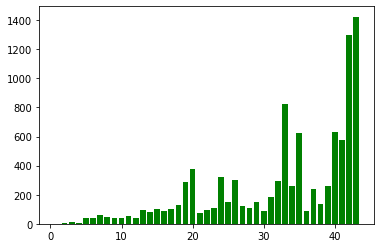

In [3]:
plt.bar(list(hist.keys()), hist.values(), color='g')
plt.show()

In [4]:
accumulatove_runner.predict('WC71A6ZLRNQ87ABOB9ZRSHM1GAX7ESV0ALKAHHAVAASEI')

13.025179862976074

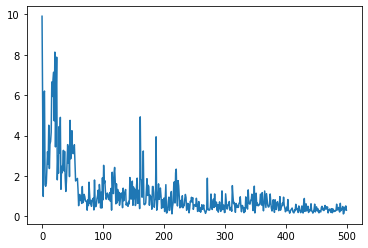

In [5]:
plt.plot(accumulatove_runner.get_loss_history())
plt.show()